<a href="https://colab.research.google.com/github/cdavid2804/test-1/blob/main/Prueba_2_FRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos de Aprendizaje por Refuerzo**

# **Prueba N°-2**

**Importar liberías**

In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import imageio
from IPython.display import Image

## **Ejercicio práctico**
## Algoritmo RL

- Desarrolle un algortimo de aprendizaje por refuerzo que permita al **agente** cruzar un lago congelado desde un **estado inicial** hacia un **estado objetivo** sin caer en ningún hoyo.
   - Elabore la **función de recompensas** adecuada para que el agente alcance el punto objetivo. Los valores de los **hiperparámetros** y el **número de episodios de entrenamiento** quedan a su criterio.  

## **Descripción del entorno**
**Frozen Lake**
- El agente toma una acción discreta. El espacio de acciones son las siguientes:

| N°- | Acción |
|----|----|
| 0 | Izquierda |
| 1 | Abajo |
| 2 | Derecha |
| 3 | Arriba |

- La observación es un valor que representa la posición actual del agente, y está dada por un estado discreto. El total de **estados discretos son 16**, los cuales van desde el 0 hasta el 15.
  - En el **estado 0** el agente inicia su recorrido.
  - En el **estado 12** se encuentra el estado objetivo que el agente debe alcanzar.
  - Los estados **2, 4, 7, 8 y 9** pertenecen a los hoyos que el agente debe evitar.

<img src="https://raw.githubusercontent.com/cdavid2804/test-1/main/Frozen4By4.png" alt="env" width="650"/>

Para más información del entorno, visite el siguiente link: https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

## **Visualización del entorno**

### **Observación el ambiente (estados y acciones)**

In [3]:
matrix = ["SFHF", "HFFH", "HHFF", "GFFF"]
env = gym.make('FrozenLake-v1',render_mode="rgb_array", desc=matrix, map_name="4x4", is_slippery=False)
state = env.reset()
num_states = env.observation_space.n
num_actions = env.action_space.n
print("numero de estados: ",num_states)
print("numero de acciones: ",num_actions)

numero de estados:  16
numero de acciones:  4


### **Observación del movimiento del agente con acciones aleatorias**

Episode: 1  Steps: 50


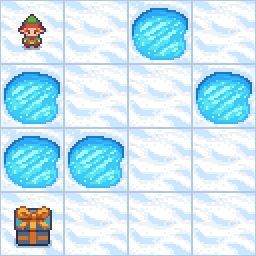

In [7]:
state = env.reset()
done = False
steps = 0
frames = []
for i in range(50):
    action = random.choice([0,1,2,3])
    next_state, _, done, _ = env.step(action)
    frame = env.render()[0]
    frames.append(frame)
    state = next_state
    steps += 1
print("Episode:",1," Steps:",steps)
env.close()
imageio.mimsave('frozen.gif', frames, fps=random.uniform(3,3.5))
Image(filename='frozen.gif')

## **Desarrollo algoritmo RL**

Desarrolle su algoritmo de aprendizaje por refuerzo a continuación:

In [16]:
# Desarrolle aquí su algoritmo aquí
alpha = 0.7
gamma = 0.995
epsilon = 1
epsilon_decay = 0.01
epsilon_min = 0.01
num_episodes = 1000
episode_reward = deque(maxlen=num_episodes)

Q = np.zeros((num_states,num_actions))

def epsilon_greedy(state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)
    else:
        return np.argmax(Q[state,:])

def reward_function(state, next_state):
    reward = 0
    hoyos = [2, 4, 7, 8, 9]
    if next_state != state:
        if next_state in hoyos:
            reward = -1
        else:
            reward = 0
    else:
        reward = -0.1
    if next_state == 12:
        reward = 1
    return reward

for episode in range(1, num_episodes+1):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0
    while not done:
        action = epsilon_greedy(state, epsilon)
        next_state, _, done, _ = env.step(action)
        steps += 1
        reward = reward_function(state, next_state)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state,:]) - Q[state,action])
        total_reward += reward
        state = next_state
    epsilon = max(epsilon_min, epsilon*(1-epsilon_decay))
    print("Episode:",episode," Total reward:",total_reward," Steps:",steps," Epsilon:",epsilon)
    episode_reward.append((episode, total_reward))
env.close()
print("Training completed")

Episode: 1  Total reward: -1  Steps: 7  Epsilon: 0.99
Episode: 2  Total reward: -1.1  Steps: 6  Epsilon: 0.9801
Episode: 3  Total reward: -1  Steps: 1  Epsilon: 0.9702989999999999
Episode: 4  Total reward: -1  Steps: 1  Epsilon: 0.96059601
Episode: 5  Total reward: -1  Steps: 1  Epsilon: 0.9509900498999999
Episode: 6  Total reward: -1.3  Steps: 6  Epsilon: 0.9414801494009999
Episode: 7  Total reward: -1.1  Steps: 2  Epsilon: 0.9320653479069899
Episode: 8  Total reward: -1.1  Steps: 2  Epsilon: 0.92274469442792
Episode: 9  Total reward: -1.2  Steps: 7  Epsilon: 0.9135172474836407
Episode: 10  Total reward: -1  Steps: 2  Epsilon: 0.9043820750088043
Episode: 11  Total reward: -1.1  Steps: 2  Epsilon: 0.8953382542587163
Episode: 12  Total reward: -1.1  Steps: 3  Epsilon: 0.8863848717161291
Episode: 13  Total reward: -1  Steps: 5  Epsilon: 0.8775210229989678
Episode: 14  Total reward: -1.3  Steps: 5  Epsilon: 0.8687458127689781
Episode: 15  Total reward: -1  Steps: 1  Epsilon: 0.86005835464

### **Graficar la recompensa total y la recompensa promedio**

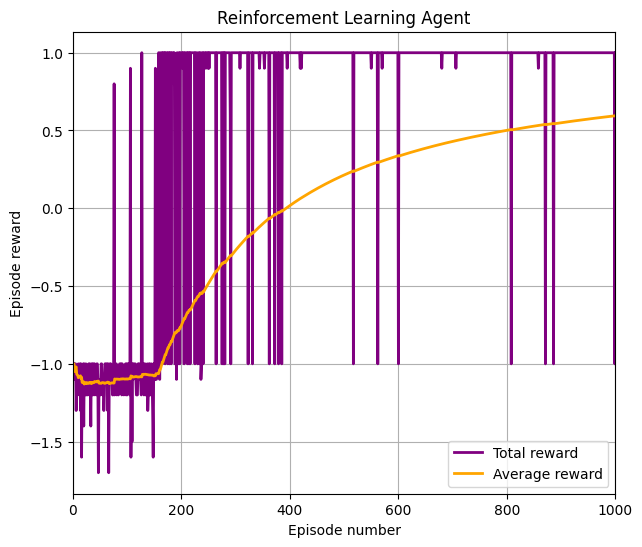

In [17]:
episodeReward = np.array(episode_reward)
episodes = episodeReward[:,0]
# Total rewards
rewards = episodeReward[:,1]
# Mean rewards
meanRewards = np.zeros(len(episodes))
for i in range(len(episodes)):
    if i == 0:
        meanRewards[0] = rewards[0]
    else:
        meanRewards[i] = np.mean(rewards[:i])
plt.figure(figsize=(7, 6))
plt.plot(episodes, rewards, label=r"Total reward", linewidth=2, color='purple')
plt.plot(episodes, meanRewards, label=r"Average reward", linewidth=2, color='orange')
plt.xlabel("Episode number")
plt.ylabel("Episode reward")
plt.title("Reinforcement Learning Agent")
plt.xlim(0, num_episodes)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid()
plt.legend()
plt.show()

### **Probar la política óptima encontrada (Tabla Q óptima)**

States Path: [0, 1, 5, 6, 10, 14, 13, 12, 12, 12]


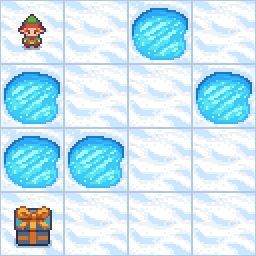

In [19]:
state = env.reset()
frames = []
states_path = []
for i in range(10):
    action = np.argmax(Q[state,:])  # Elegir la mejor acción según la tabla Q
    next_state, _, _, _ = env.step(action)
    frame = env.render()[0]
    frames.append(frame)
    states_path.append(state)
    state = next_state
env.close()
print("States Path:",states_path)
imageio.mimsave('frozenT.gif', frames, fps=random.uniform(3,3.5))
Image(filename='frozenT.gif')